In [1]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("used_cars.csv")

In [3]:
df.head()

,Unnamed: 0,manufacturer,car_name,year,no_of_owners,kms_driven,city,transmission,mileage,fuel_type,mode_of_sale,seats,engine,max_power,price,links
0,0,Audi,A8,2016,First,"25,000",bangalore,Automatic,16.77,Diesel,Dealer,4,2967,246.74,59.5,https://www.cardekho.com/used-car-details/used...
1,1,Honda,Amaze,2018,First,"20,668",bangalore,Automatic,19.0,Petrol,Dealer,5,1199,88.76,7.99,https://www.cardekho.com/used-car-details/used...
2,2,Honda,Jazz,2017,First,"49,000",bangalore,Manual,18.7,Petrol,Dealer,5,1199,88.70,6.35,https://www.cardekho.com/used-car-details/used...
3,3,Ford,Ecosport,2019,First,"10,012",bangalore,Automatic,14.7,Petrol,Dealer,5,1496,120.69,10.99,https://www.cardekho.com/used-car-details/used...
4,4,Mercedes-Benz,GL-Class,2010,Second,"80,000",bangalore,Automatic,12.0,Diesel,Individual,7,2987,224.00,20,https://www.cardekho.com/used-car-details/used...


In [4]:
df.drop(['Unnamed: 0','links'], axis=1,inplace=True)

---

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 778 entries, 0 to 777
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  778 non-null    object 
 1   car_name      778 non-null    object 
 2   year          778 non-null    int64  
 3   no_of_owners  778 non-null    object 
 4   kms_driven    778 non-null    object 
 5   city          778 non-null    object 
 6   transmission  778 non-null    object 
 7   mileage       778 non-null    object 
 8   fuel_type     778 non-null    object 
 9   mode_of_sale  778 non-null    object 
 10  seats         778 non-null    int64  
 11  engine        778 non-null    int64  
 12  max_power     769 non-null    float64
 13  price         778 non-null    object 
dtypes: float64(1), int64(3), object(10)
memory usage: 85.2+ KB


From the info above we observe that kms driven, mileage and price are object data type  
* Converting kms_driven, mileage and price to float

In [6]:
df['mileage'].unique()

array(['16.77', '19.0', '18.7', '14.7', '12.0', '18.0', '19.56', '17.9',
       '16.95', '24.3', '17.09', '22.0', '23.1', '25.2', '17.6', '18.6',
       '20.73', '20.51', '20.89', '22.32', '12.8', '16.65', '16.46',
       '21.4', '14.8', '17.84', '27.39', '17.01', '27.3', '22.54', '21.7',
       '23.0', '28.4', '14.11', '20.04', '21.01', '15.34', '16.78',
       '18.12', '17.67', '23.95', '19.3', '22.48', '16.1', '11.18',
       '17.3', '13.01', '12.98', '16.2', '19.34', '18.1', '20.0', '7.81',
       '18.27', '23.01', '11.2', '23.2', '24.04', '20.4', '18.9', '21.8',
       '22.27', '16.55', '13.0', '18.2', '23.59', '16.02', '19.67',
       '20.8', '18.15', '17.0', '18.5', '19.81', '20.3', '16.0', '20.7',
       '19.1', '0.0', '17.43', '17.8', '16.47', '17.1', '22.1', '17.19',
       '21.9', '23.4', '20.5', '21.19', '21.21', '11.0', '17.74', '20.38',
       '19.5', '17.5', '13.7', '12.1', '21.12', '14.16', '21.76', '21.63',
       '10.5', '24.29', '24.0', '19.4', '20.77', '19.68', '21.

In [7]:
df['mileage'][df['mileage'] == '0.0 k'] = '0.0'

In [8]:
df['price'] = df['price'].apply(lambda x: x.replace(',','')).astype(float)
df['kms_driven'] = df['kms_driven'].apply(lambda x: x.replace(',','')).astype(float)
df['mileage'] = df['mileage'].astype(float)

In [9]:
df.describe()

,year,kms_driven,mileage,seats,engine,max_power,price
count,778.000000,778.000000,778.000000,778.000000,778.000000,769.000000,778.000000
mean,2014.541131,62247.542416,19.115861,5.350900,1507.447301,101.054213,2148.475141
std,3.909725,48207.053619,4.377027,0.867847,524.127641,45.521717,12544.486275
min,1994.000000,478.000000,0.000000,4.000000,72.000000,34.200000,1.000000
25%,2013.000000,27075.000000,16.780000,5.000000,1197.000000,73.900000,3.700000
50%,2015.000000,54000.000000,19.300000,5.000000,1364.000000,86.700000,5.750000
75%,2017.000000,80000.000000,21.975000,5.000000,1591.000000,117.300000,8.750000
max,2021.000000,400000.000000,30.460000,10.000000,3198.000000,362.070000,95000.000000


From this Describe function gives us basic statistics computed on the dataset
* The numerical column max_power has less values in count. There could be some missing data which should be cleansed.
* *Mileage* is having min value as '0', which looks incorrect or outlier. Could be potential candidate for correction/discard the data
* From the summary above, we see that prices are in lakth and go up to over ₹95000 Lakhs! This is obviously wrong. While looking at all cars below ₹1,00,000 in more detail, I noticed that many of these prices are confused with thousands: I found prices such as ‘75000’, ‘80000', '95000', etc which definitely say prices in thousands. To try and filter out most of these issues, I filtered all the observations < than ₹1 Lakh and divided it with 1,00,000 to denote all the prices in lakhs. Altenatively, we could multiply all the observations > ₹1 Lakh with 1,00,000 to denote prices in thousands and lakhs but have one denotion of price and short lenght on values was more easy to work on.

In [10]:
df.isnull().sum()

manufacturer    0
car_name        0
year            0
no_of_owners    0
kms_driven      0
city            0
transmission    0
mileage         0
fuel_type       0
mode_of_sale    0
seats           0
engine          0
max_power       9
price           0
dtype: int64

In [11]:
df.fillna(df.mean(),inplace=True)

In [12]:
df.isnull().sum().sum()

0

Removing the outliers

In [13]:
df['mileage'][df['mileage'] == 0] = df['mileage'].mode()

Setting prices to lakhs

In [14]:
df.price[df['price'] > 1000] = df['price']/100000

In [15]:
df.describe()

,year,kms_driven,mileage,seats,engine,max_power,price
count,778.000000,778.000000,771.000000,778.000000,778.000000,778.000000,778.000000
mean,2014.541131,62247.542416,19.289416,5.350900,1507.447301,101.054213,8.393715
std,3.909725,48207.053619,3.997551,0.867847,524.127641,45.257310,10.418396
min,1994.000000,478.000000,7.810000,4.000000,72.000000,34.200000,0.400000
25%,2013.000000,27075.000000,16.800000,5.000000,1197.000000,73.900000,3.450000
50%,2015.000000,54000.000000,19.300000,5.000000,1364.000000,86.800000,5.500000
75%,2017.000000,80000.000000,22.000000,5.000000,1591.000000,117.300000,8.410000
max,2021.000000,400000.000000,30.460000,10.000000,3198.000000,362.070000,79.000000


We could also use *seats* feature to derive a new feature *type_of_car* based on no. of seats the car has. This categorical variable has 4 levels which indicates the body style of the car (small car, midsize car, big car and mini van).

In [16]:
def seats(x):
    if x < 5:
        return "small car"
    elif x == 5:
        return "midsize car"
    elif x > 5 and x <= 7:
        return "big car"
    elif x > 7:
        return "mini van"
    else:
        return None

In [17]:
df['type_of_car'] = df.seats.apply(seats)

In [18]:
df.head()

,manufacturer,car_name,year,no_of_owners,kms_driven,city,transmission,mileage,fuel_type,mode_of_sale,seats,engine,max_power,price,type_of_car
0,Audi,A8,2016,First,25000.0,bangalore,Automatic,16.77,Diesel,Dealer,4,2967,246.74,59.50,small car
1,Honda,Amaze,2018,First,20668.0,bangalore,Automatic,19.00,Petrol,Dealer,5,1199,88.76,7.99,midsize car
2,Honda,Jazz,2017,First,49000.0,bangalore,Manual,18.70,Petrol,Dealer,5,1199,88.70,6.35,midsize car
3,Ford,Ecosport,2019,First,10012.0,bangalore,Automatic,14.70,Petrol,Dealer,5,1496,120.69,10.99,midsize car
4,Mercedes-Benz,GL-Class,2010,Second,80000.0,bangalore,Automatic,12.00,Diesel,Individual,7,2987,224.00,20.00,big car


---

### Which car manufacturers had highest sales?

In [19]:
car_sales = pd.DataFrame(df.manufacturer.value_counts())
car_sales.head()

,manufacturer
Maruti,224
Hyundai,139
Mahindra,56
Toyota,52
Ford,48


Text(0.5, 1.0, 'Top 10 car brands on sale')

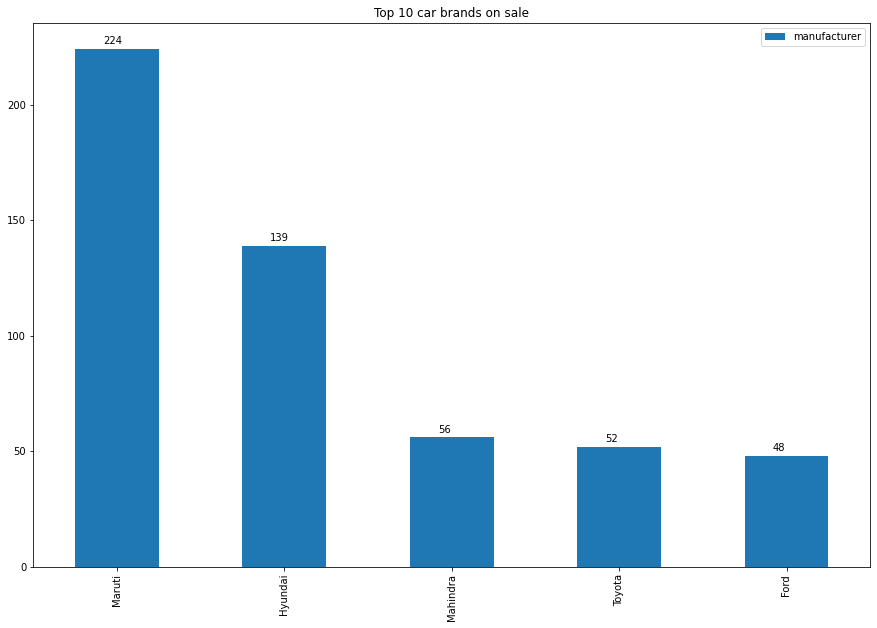

In [21]:
ax = car_sales.head().plot.bar(figsize=(15,10))

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + (p.get_width()/3), p.get_height()+2), rotation=0)

plt.title("Top 10 car brands on sale")

From the dataset, the top performing car sales are from following manufacturers
1. Maruti - 224    
2. Hyundai - 139  
3. Mahindra - 56            
4. Toyota - 52
5. Ford - 48

---
### What is the sales trend for top selling car manufacturers?

In [34]:
carsales_year = pd.DataFrame(df.groupby('year').manufacturer.value_counts())
carsales_year.rename(columns={'manufacturer':'sales'}, inplace=True)
carsales_year.reset_index(inplace=True)

In [36]:
carsales_year.head()

,year,manufacturer,sales
0,1994,Maruti,1
1,1996,Maruti,1
2,1997,Maruti,1
3,1998,Maruti,1
4,2000,Maruti,1


In [40]:
carsales_year[carsales_year.manufacturer.isin(car_sales.head(5).index)]

,year,manufacturer,sales
0,1994,Maruti,1
1,1996,Maruti,1
2,1997,Maruti,1
3,1998,Maruti,1
4,2000,Maruti,1
...,...,...,...
173,2019,Ford,3
178,2020,Hyundai,4
180,2020,Maruti,2
181,2020,Mahindra,1


<AxesSubplot:xlabel='year', ylabel='sales'>

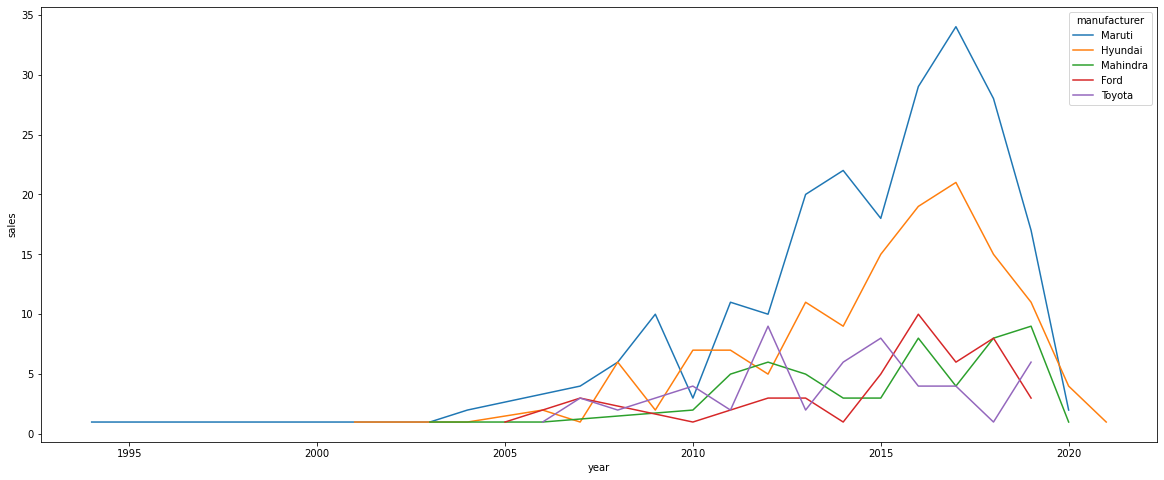

In [42]:
topCarSales = carsales_year[carsales_year.manufacturer.isin(car_sales.head().index)]
fig, ax = plt.subplots(figsize=(20,8))
sns.lineplot(data=topCarSales, x='year', y='sales', hue='manufacturer')

<AxesSubplot:xlabel='year', ylabel='sales'>

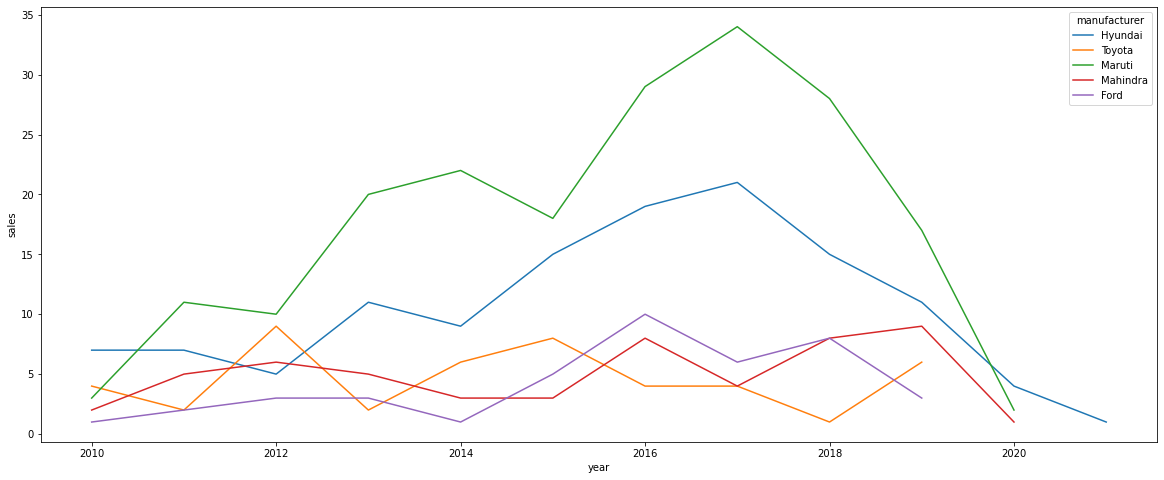

In [44]:
recentCarSales = carsales_year[carsales_year.manufacturer.isin(car_sales.head().index) &  (carsales_year.year >= 2010)]
fig, ax = plt.subplots(figsize=(20,8))
sns.lineplot(data=recentCarSales, x='year', y='sales', hue='manufacturer')

### **Observations**:
1. Overall Maruti used car are reported high sales and occupies 1st place, also in the recent past, the sales are performing very high in the recent past with sudden drop in the sales in the year 2020.
2. Hyundai significantly performing best sales with sudden drop in the sales in the year 2020. 
3. Toyota, Ford and Mahindra cars are consistant in sales and keeping their position consistant.

---
### Which cars gain or loose the market?

In [68]:
# Function that returns perticular year sales

def get_SalesByYear(year):
    return carsales_year[carsales_year.year == year]


# Function that returns rank of a car

def get_CarSalesRankByYear(r):
    print('r: ',r.head())
    result = get_SalesByYear(r.year).sales.unique()
    print('result: ',result)
    i, = np.where(result == r.sales)
    print('r.sales: ',r.sales)
    print('i: ',i)
    print('''i[0]+1: ''',i)
    print('\n')
    return i[0]+1

In [69]:
carsales_year['year_rank'] = 0

In [70]:
# Add a new column called 'year_rank' to maintain year wise car sales rank

carsales_year['year_rank'] = carsales_year.apply(get_CarSalesRankByYear, axis=1)

r:  year              1994
manufacturer    Maruti
sales                1
year_rank            0
Name: 0, dtype: object
result:  [1]
r.sales:  1
i:  [0]
i[0]+1:  [0]


r:  year              1996
manufacturer    Maruti
sales                1
year_rank            0
Name: 1, dtype: object
result:  [1]
r.sales:  1
i:  [0]
i[0]+1:  [0]


r:  year              1997
manufacturer    Maruti
sales                1
year_rank            0
Name: 2, dtype: object
result:  [1]
r.sales:  1
i:  [0]
i[0]+1:  [0]


r:  year              1998
manufacturer    Maruti
sales                1
year_rank            0
Name: 3, dtype: object
result:  [1]
r.sales:  1
i:  [0]
i[0]+1:  [0]


r:  year              2000
manufacturer    Maruti
sales                1
year_rank            0
Name: 4, dtype: object
result:  [1]
r.sales:  1
i:  [0]
i[0]+1:  [0]


r:  year               2001
manufacturer    Hyundai
sales                 1
year_rank             0
Name: 5, dtype: object
result:  [1]
r.sales:  1
i:  [0]
i[0]+1:  

r.sales:  4
i:  [4]
i[0]+1:  [4]


r:  year            2016
manufacturer    Land
sales              2
year_rank          0
Name: 129, dtype: object
result:  [29 19 10  8  4  2  1]
r.sales:  2
i:  [5]
i[0]+1:  [5]


r:  year                  2016
manufacturer    Volkswagen
sales                    2
year_rank                0
Name: 130, dtype: object
result:  [29 19 10  8  4  2  1]
r.sales:  2
i:  [5]
i[0]+1:  [5]


r:  year            2016
manufacturer    Audi
sales              1
year_rank          0
Name: 131, dtype: object
result:  [29 19 10  8  4  2  1]
r.sales:  1
i:  [6]
i[0]+1:  [6]


r:  year                     2016
manufacturer    Mercedes-Benz
sales                       1
year_rank                   0
Name: 132, dtype: object
result:  [29 19 10  8  4  2  1]
r.sales:  1
i:  [6]
i[0]+1:  [6]


r:  year             2016
manufacturer    Skoda
sales               1
year_rank           0
Name: 133, dtype: object
result:  [29 19 10  8  4  2  1]
r.sales:  1
i:  [6]
i[0]+1:  [6]


r

In [71]:
carsales_year.head()

,year,manufacturer,sales,year_rank
0,1994,Maruti,1,1
1,1996,Maruti,1,1
2,1997,Maruti,1,1
3,1998,Maruti,1,1
4,2000,Maruti,1,1


In [104]:
# Top 5 ranked cars from 2009

recenttopcars = carsales_year[(carsales_year.year_rank <=5) &  (carsales_year.year >= 2009) & (carsales_year.year <= 2019)].manufacturer.unique()
recenttopcars

array(['Maruti', 'Hyundai', 'Volkswagen', 'Mitsubishi', 'Toyota', 'Tata',
       'Mahindra', 'BMW', 'Chevrolet', 'Fiat', 'Ford', 'Mercedes-Benz',
       'Nissan', 'Audi', 'Honda', 'Renault'], dtype=object)

In [107]:
alltime_topcars = carsales_year[carsales_year.year_rank <=5].manufacturer.unique()
alltime_topcars

array(['Maruti', 'Hyundai', 'Daewoo', 'Mahindra', 'OpelCorsa', 'Tata',
       'Ford', 'Chevrolet', 'Skoda', 'Honda', 'Toyota', 'Ambassador',
       'Volkswagen', 'Mitsubishi', 'BMW', 'Fiat', 'Mercedes-Benz',
       'Nissan', 'Audi', 'Renault', 'Kia'], dtype=object)

In [110]:
recentCarSalesRanks = carsales_year[carsales_year.manufacturer.isin(recenttopcars) & (carsales_year.year >= 2009) & (carsales_year.year <= 2019)]

In [111]:
recentCarSalesRanks

,year,manufacturer,sales,year_rank
37,2009,Maruti,10,1
38,2009,Hyundai,2,2
39,2009,Volkswagen,2,2
40,2009,Mitsubishi,1,3
41,2010,Hyundai,7,1
...,...,...,...,...
171,2019,Volkswagen,5,6
172,2019,Renault,4,7
173,2019,Ford,3,8
175,2019,Mercedes-Benz,2,9


In [112]:
recentCarSalesRanks.pivot_table(index=['year'], columns={'manufacturer'}, values='sales')

manufacturer,Audi,BMW,Chevrolet,Fiat,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes-Benz,Mitsubishi,Nissan,Renault,Tata,Toyota,Volkswagen
year,,,,,,,,,,,,,,,,
2009,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,10.0,NaN,1.0,NaN,NaN,NaN,NaN,2.0
2010,NaN,1.0,1.0,1.0,1.0,NaN,7.0,2.0,3.0,1.0,NaN,NaN,NaN,3.0,4.0,NaN
2011,NaN,1.0,3.0,NaN,2.0,NaN,7.0,5.0,11.0,NaN,NaN,NaN,NaN,2.0,2.0,4.0
2012,1.0,NaN,3.0,2.0,3.0,3.0,5.0,6.0,10.0,3.0,NaN,NaN,1.0,4.0,9.0,1.0
2013,4.0,NaN,NaN,1.0,3.0,1.0,11.0,5.0,20.0,1.0,NaN,6.0,1.0,1.0,2.0,5.0
2014,NaN,3.0,1.0,NaN,1.0,4.0,9.0,3.0,22.0,3.0,NaN,1.0,4.0,2.0,6.0,2.0
2015,1.0,1.0,2.0,NaN,5.0,5.0,15.0,3.0,18.0,NaN,NaN,4.0,4.0,3.0,8.0,3.0
2016,1.0,8.0,NaN,NaN,10.0,8.0,19.0,8.0,29.0,1.0,NaN,NaN,4.0,4.0,4.0,2.0
2017,NaN,3.0,NaN,1.0,6.0,8.0,21.0,4.0,34.0,1.0,NaN,NaN,NaN,1.0,4.0,4.0


In [113]:
recentCarSalesRanks.pivot_table(index=['year'], columns={'manufacturer'}, values='year_rank')

manufacturer,Audi,BMW,Chevrolet,Fiat,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes-Benz,Mitsubishi,Nissan,Renault,Tata,Toyota,Volkswagen
year,,,,,,,,,,,,,,,,
2009,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,1.0,NaN,3.0,NaN,NaN,NaN,NaN,2.0
2010,NaN,5.0,5.0,5.0,5.0,NaN,1.0,4.0,3.0,5.0,NaN,NaN,NaN,3.0,2.0,NaN
2011,NaN,7.0,5.0,NaN,6.0,NaN,2.0,3.0,1.0,NaN,NaN,NaN,NaN,6.0,6.0,4.0
2012,8.0,NaN,6.0,7.0,6.0,6.0,4.0,3.0,1.0,6.0,NaN,NaN,8.0,5.0,2.0,8.0
2013,5.0,NaN,NaN,8.0,6.0,8.0,2.0,4.0,1.0,8.0,NaN,3.0,8.0,8.0,7.0,4.0
2014,NaN,5.0,7.0,NaN,7.0,4.0,2.0,5.0,1.0,5.0,NaN,7.0,4.0,6.0,3.0,6.0
2015,8.0,8.0,7.0,NaN,4.0,4.0,2.0,6.0,1.0,NaN,NaN,5.0,5.0,6.0,3.0,6.0
2016,7.0,4.0,NaN,NaN,3.0,4.0,2.0,4.0,1.0,7.0,NaN,NaN,5.0,5.0,5.0,6.0
2017,NaN,6.0,NaN,8.0,4.0,3.0,2.0,5.0,1.0,8.0,NaN,NaN,NaN,8.0,5.0,5.0


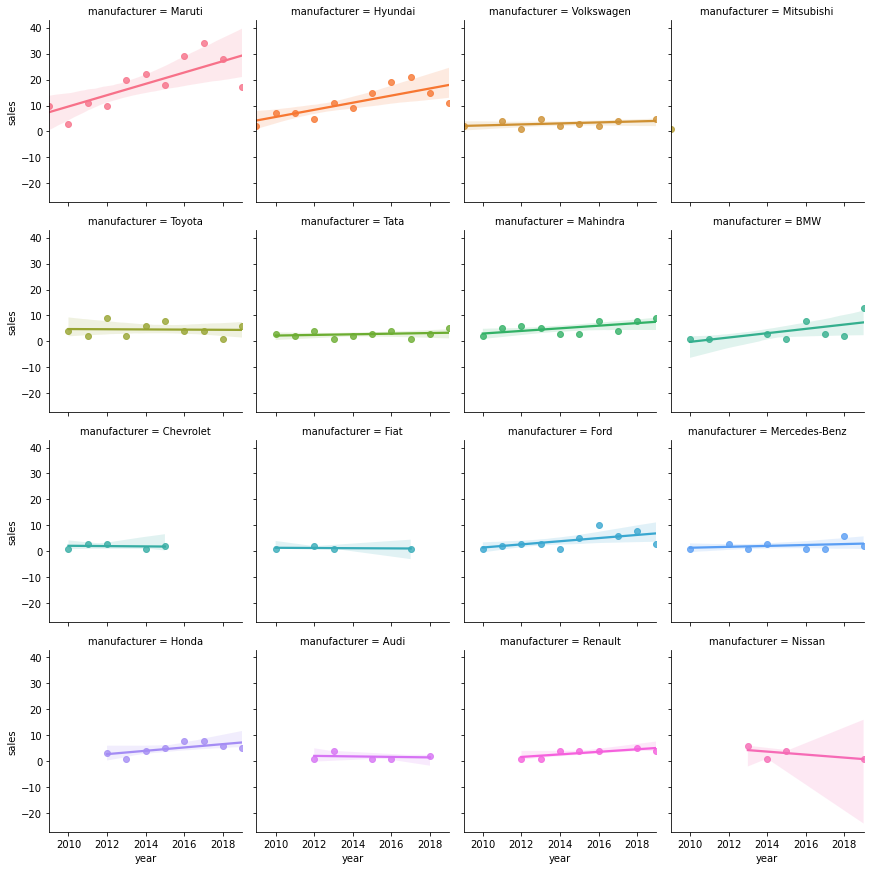

In [114]:
sns.lmplot(data=recentCarSalesRanks, x='year', y='sales', col='manufacturer', fit_reg=True, hue='manufacturer', col_wrap=4, height=3)

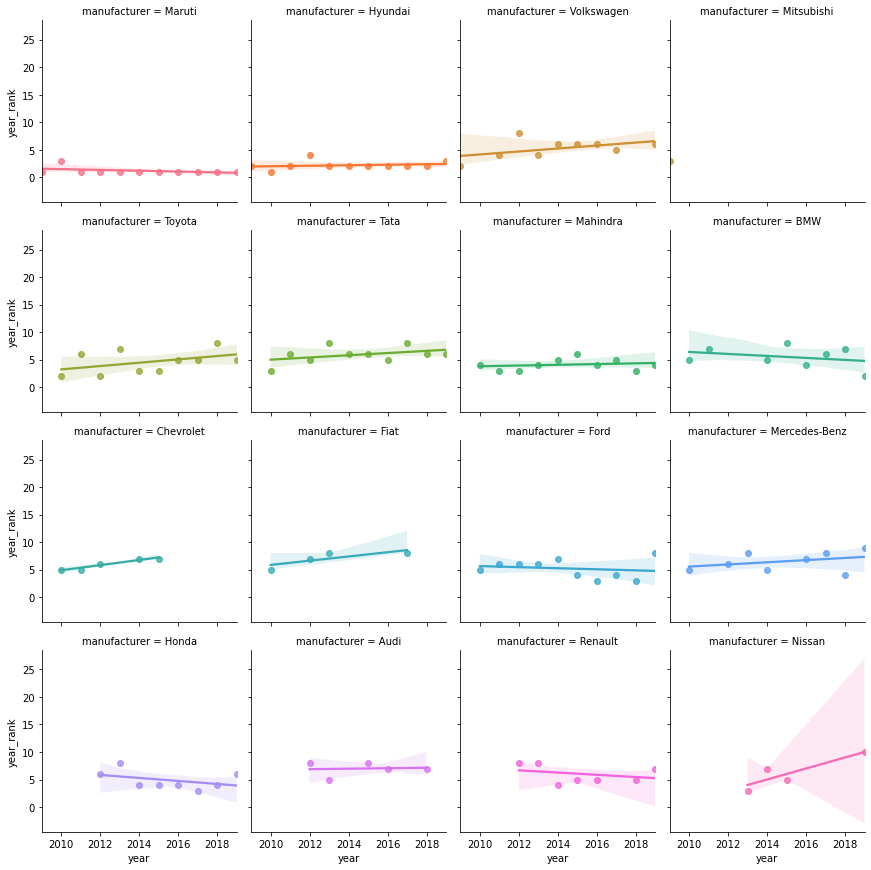

In [115]:
sns.lmplot(data=recentCarSalesRanks, x='year', y='year_rank', col='manufacturer', fit_reg=True, hue='manufacturer', col_wrap=4, height=3)

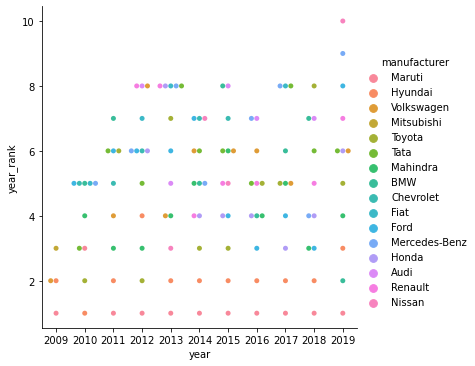

In [116]:
sns.catplot(x="year", y="year_rank", hue="manufacturer", kind="swarm", data=recentCarSalesRanks)

In [117]:
alltime_topcars = pd.DataFrame(alltime_topcars)

In [118]:
alltime_topcars.rename(columns={0:'manufacturer'}, inplace=True)

In [119]:
alltime_topcars.head()

,manufacturer
0,Maruti
1,Hyundai
2,Daewoo
3,Mahindra
4,OpelCorsa


In [120]:
def get_IsTopSelling(r):
    return r.manufacturer in recenttopcars

In [121]:
alltime_topcars['is_top_selling'] = alltime_topcars.apply(get_IsTopSelling, axis=1)

In [122]:
alltime_topcars.head()

,manufacturer,is_top_selling
0,Maruti,True
1,Hyundai,True
2,Daewoo,False
3,Mahindra,True
4,OpelCorsa,False


In [129]:
alltime_topcars[alltime_topcars.is_top_selling == False].manufacturer.values

array(['Daewoo', 'OpelCorsa', 'Skoda', 'Ambassador', 'Kia'], dtype=object)

In [128]:
alltime_topcars[alltime_topcars.is_top_selling == True].manufacturer.values

['Maruti' 'Hyundai' 'Mahindra' 'Tata' 'Ford' 'Chevrolet' 'Honda' 'Toyota'
 'Volkswagen' 'Mitsubishi' 'BMW' 'Fiat' 'Mercedes-Benz' 'Nissan' 'Audi'
 'Renault']


### Observations:

* Following are the brands which **loose the market**
    * Daewoo
    * OpelCorsa
    * Skoda
    * Ambassador
    * Kia

* Following are the brands which **gain/sustain the market**
    * Maruti
    * Hyundai
    * Mahindra
    * Tata
    * Ford
    * Chevrolet
    * Honda
    * Toyota
    * Volkswagen
    * Mitsubishi
    * BMW
    * Fiat
    * Mercedes-Benz
    * Nissan
    * Audi
    * Renault


---
### Top 10 Pemium cars & models and their sales

In [372]:
premium_ten = pd.DataFrame(df.groupby('car_name').max())

In [373]:
premium_ten.reset_index(inplace=True)
premium_ten.rename(columns={'price':'max_price'}, inplace=True)

In [374]:
premium_ten = premium_ten.sort_values('max_price', ascending=False)

In [380]:
premium_ten.head(10)

,car_name,manufacturer,year,no_of_owners,kms_driven,city,transmission,mileage,fuel_type,mode_of_sale,seats,engine,max_power,max_price,type_of_car,class
57,GLS,Mercedes-Benz,2019,First,52520.0,mumbai,Automatic,11.00,Diesel,Dealer,7,2987,258.00,79.00,big car,Premium
3,6,BMW,2019,First,16000.0,gurgaon,Automatic,17.09,Petrol,Dealer,4,2993,261.40,65.00,small car,Premium
101,Rover,Land,2018,Second,73000.0,coimbatore,Automatic,12.83,Petrol,Individual,7,2995,335.25,62.00,midsize car,Premium
9,A8,Audi,2016,First,25000.0,bangalore,Automatic,16.77,Diesel,Dealer,4,2967,246.74,59.50,small car,Premium
136,X4,BMW,2019,First,16110.0,delhi ncr,Automatic,16.78,Diesel,Dealer,5,1995,190.00,56.75,midsize car,Premium
135,X3,BMW,2019,Fourth & Abov,72900.0,coimbatore,Automatic,18.56,Diesel,Dealer,5,2993,258.00,53.90,midsize car,Premium
4,7,BMW,2015,First,44000.0,mumbai,Automatic,16.46,Diesel,Dealer,5,2993,258.00,49.50,midsize car,Premium
1,3,BMW,2019,First,96500.0,pune,Automatic,22.69,Petrol,Individual,5,1998,248.00,48.50,midsize car,Premium
39,E-Class,Mercedes-Benz,2018,Second,177000.0,gurgaon,Automatic,17.00,Diesel,Individual,5,2987,254.80,45.00,midsize car,Premium
2,5,BMW,2018,First,51000.0,pune,Automatic,22.48,Diesel,Dealer,5,1995,190.00,44.00,midsize car,Premium


<Figure size 576x432 with 0 Axes>

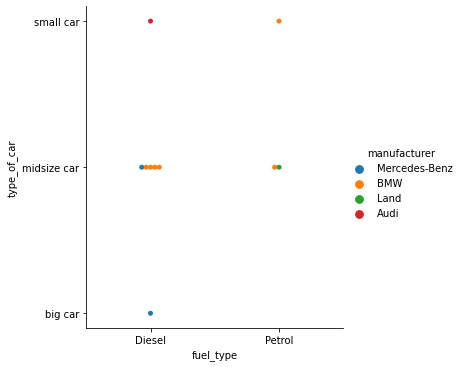

In [258]:
plt.figure(figsize=(8,6))
sns.catplot(data=premium_ten, x='fuel_type', y='type_of_car', hue='manufacturer', kind='swarm')

In [242]:
cars_max_price = cars_max_price.sort_values('max_price', ascending=False)

In [243]:
cars_max_price = pd.DataFrame(df.groupby('manufacturer')['price'].max())

In [244]:
cars_max_price.reset_index(inplace=True)
cars_max_price.rename(columns={'price':'max_price'}, inplace=True)

In [246]:
def get_latestyearofsale(r):
    return df[(df.manufacturer == r.manufacturer) & (df.price == r.max_price)].year.max()

In [247]:
cars_max_price['recently_sold_on'] = cars_max_price.apply(get_latestyearofsale, axis=1)

In [254]:
cars_max_price.head()

,manufacturer,max_price,recently_sold_on
0,Ambassador,1.85,2007
1,Audi,59.50,2016
2,BMW,65.00,2019
3,Chevrolet,6.50,2014
4,Daewoo,0.65,2002


<AxesSubplot:xlabel='recently_sold_on', ylabel='max_price'>

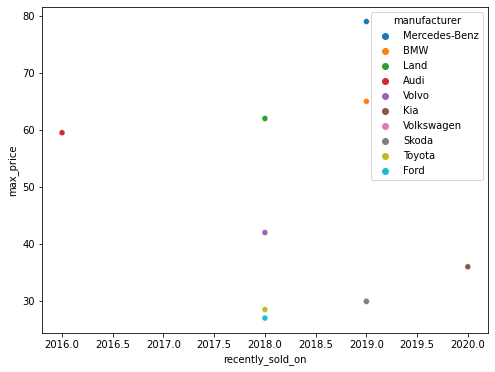

In [249]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=cars_max_price.sort_values('max_price', ascending=False).head(10), x='recently_sold_on', y='max_price', hue='manufacturer')

---
### Observations:

**Top 10 premium car's sales reported as follows.**
* Mercedes-Benz 
    - GLS
    - E-Class
* BMW 
    - 3-Series
    - 5-Series
    - 6-Series
    - 7-Series
    - X3
    - X4
* Audi A8
* Land Rover
    

* Following cars are reported premium car sales in recent years:
    - Mercedes-Benz
    - BMW
    - Skoda
    - Kia


* It's also worth to note that, 
    * **Midsize cars** are leading in this space
    * All of the cars have transmissiom type **Automatic**
    * Majority of these premium cars engine type is **Diesel** 



---
### Best selling in each type and class of car

In [264]:
def car_class(x):
    if x.price <= 10.0:
        return "Economy"
    elif (x.price > 10.0) & (x.price <= 20.0):
        return "Luxury"
    else:
        return "Premium"

In [265]:
df["class"] = df.apply(car_class, axis=1)

Text(0.5, 1.0, 'Car sales based on Class')

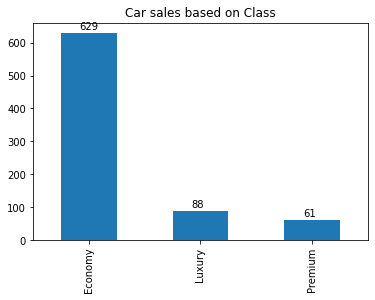

In [268]:
ax = df["class"].value_counts().plot.bar(figsize=(6,4))
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + (p.get_width()/3), p.get_height()+10), rotation=0)
    
plt.title("Car sales based on Class")

### Observations:

* Economy Cars are best selling segment followed by Luxury and Premium

---
###  Sales trend based on body

In [291]:
toc_df = df.pivot_table(index=['type_of_car'],  values="manufacturer", aggfunc='count')

In [292]:
toc_df.reset_index(inplace=True)
toc_df.rename(columns={'manufacturer':'sales'}, inplace=True)

In [293]:
toc_df

,type_of_car,sales
0,big car,103
1,midsize car,640
2,mini van,25
3,small car,10


Text(0.5, 1.0, 'Overall car sales based on body type')

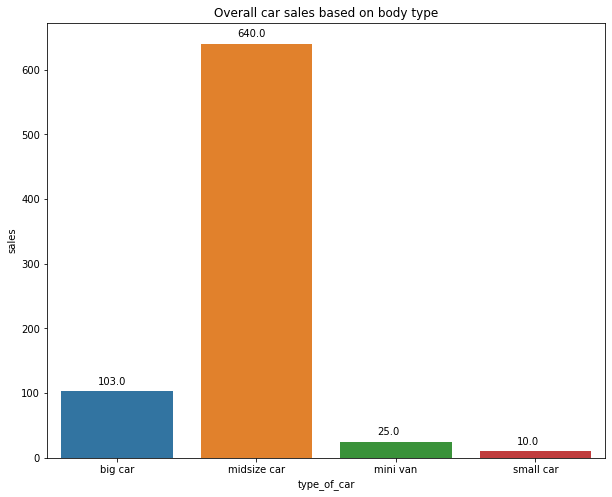

In [296]:
fig, ax = plt.subplots(figsize=(10,8))
sns.barplot(data=toc_df, x='type_of_car', y='sales')
plt.title('Overall car sales based on body type')

### Observations:
  
* Overall Midsize Cars are more demanded type of car
* It is observed that recent midsize car sales are also skyrocketing.
* **Mini Van** and **Small Cars** are loosing sales and **other** cars are gaining market.

---
### Best mileage cars in each segment of 'class'

In [300]:
mileage_cars = df.pivot_table(index=['class','manufacturer'],  values="mileage", aggfunc='max')
mileage_cars.reset_index(inplace=True)

In [302]:
mileage_cars.head()

,class,manufacturer,mileage
0,Economy,Ambassador,13.50
1,Economy,BMW,16.07
2,Economy,Chevrolet,25.44
3,Economy,Daewoo,18.50
4,Economy,Datsun,22.70


Text(0.5, 1.0, 'Mileage vs Class')

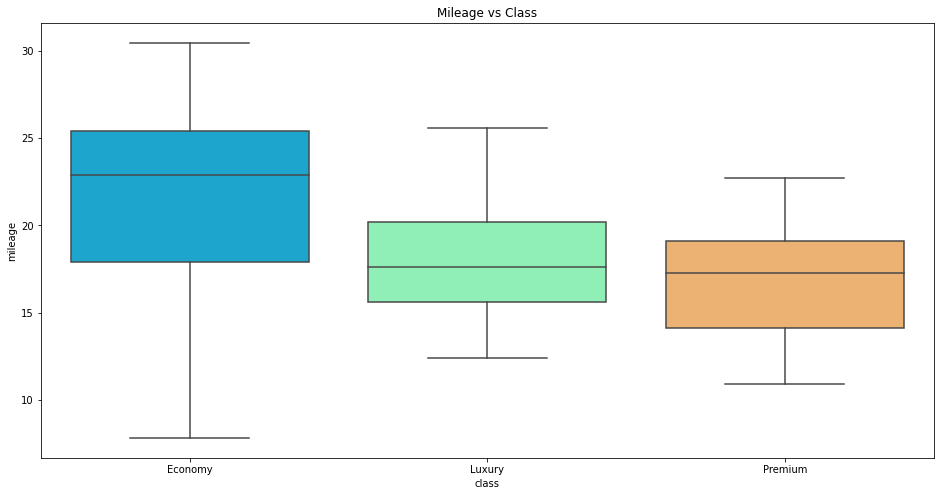

In [303]:
plt.figure(figsize=(16, 8))
sns.boxplot(data=mileage_cars, x='class', y='mileage', palette='rainbow')
plt.title('Mileage vs Class')

In [309]:
def get_upperwhisker(cls):
    clsmileage = mileage_cars[mileage_cars['class'] == cls]
    maxval = clsmileage.mileage.max()
    thirdQurtile = clsmileage.describe().iloc[6].mileage   
    firstQurtile = clsmileage.describe().iloc[4].mileage     
    iqr = thirdQurtile - firstQurtile
    upperwhisker = min(maxval, thirdQurtile + (1.5 * iqr))
    return upperwhisker

def get_closest(cls, val):
    cls_df = df[df['class'] == cls]
    return cls_df.iloc[(cls_df['mileage']-val).abs().argsort()[:2]]

In [310]:
get_closest('Economy', get_upperwhisker('Economy'))

,manufacturer,car_name,year,no_of_owners,kms_driven,city,transmission,mileage,fuel_type,mode_of_sale,seats,engine,max_power,price,type_of_car,class
390,Tata,Nexon,2018,First,10000.0,agartala,Manual,17.00,Petrol,Individual,5,1198,108.5,5.50,midsize car,Economy
149,Hyundai,Verna,2013,First,55000.0,pune,Manual,17.01,Petrol,Dealer,5,1591,121.3,3.95,midsize car,Economy


In [311]:
get_closest('Luxury', get_upperwhisker('Luxury'))

,manufacturer,car_name,year,no_of_owners,kms_driven,city,transmission,mileage,fuel_type,mode_of_sale,seats,engine,max_power,price,type_of_car,class
438,Mercedes-Benz,E-Class,2014,First,42001.0,ahwa,Automatic,13.0,Diesel,Dealer,5,2143,204.0,15.75,midsize car,Luxury
532,Jeep,Compass,2018,First,15000.0,bhilai,Manual,17.1,Diesel,Individual,5,1956,170.0,14.00,midsize car,Luxury


In [312]:
get_closest('Premium', get_upperwhisker('Premium'))

,manufacturer,car_name,year,no_of_owners,kms_driven,city,transmission,mileage,fuel_type,mode_of_sale,seats,engine,max_power,price,type_of_car,class
713,BMW,3,2016,First,76000.0,coimbatore,Automatic,22.69,Diesel,Dealer,5,1995,190.0,27.0,midsize car,Premium
714,BMW,3,2016,First,69000.0,coimbatore,Automatic,22.69,Diesel,Dealer,5,1995,190.0,21.0,midsize car,Premium


### Observations:
  
* Following are the best mileage given cars in each segment.
    * Economy --> Tata Nexon & Hyundai Verna
    * Luxury  --> Mercedes Benz E-Class & Jeep Compass
    * Premium --> BMW 3-Series

### Class vs Price

<AxesSubplot:xlabel='year', ylabel='price'>

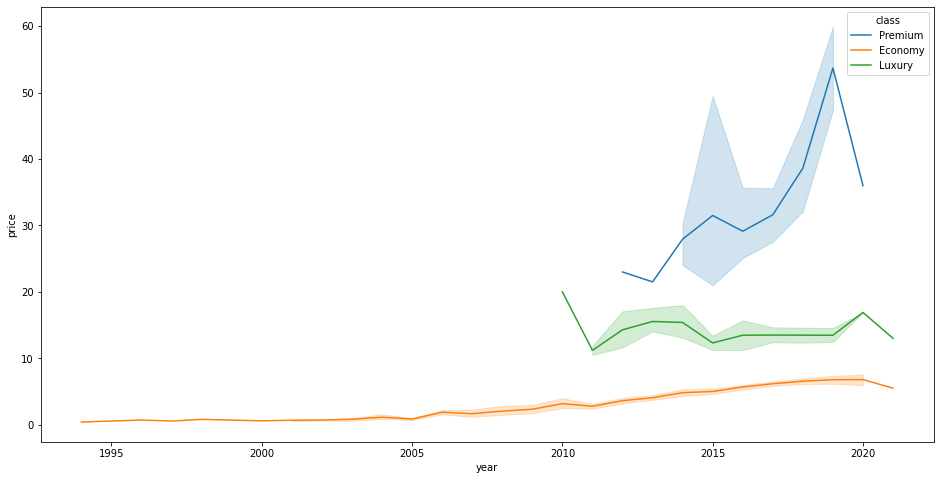

In [365]:
plt.figure(figsize=(16,8))
sns.lineplot(data=df, x='year', y='price', hue='class')

### Fuel type vs Price

In [314]:
df['fuel_type'].value_counts()

Diesel      444
Petrol      327
CNG           4
LPG           2
Electric      1
Name: fuel_type, dtype: int64

In [319]:
fuel_df = df[(df['fuel_type'] == 'Diesel') | (df['fuel_type'] == 'Petrol')]

Text(0.5, 1.0, 'Overall car prices by fuel type')

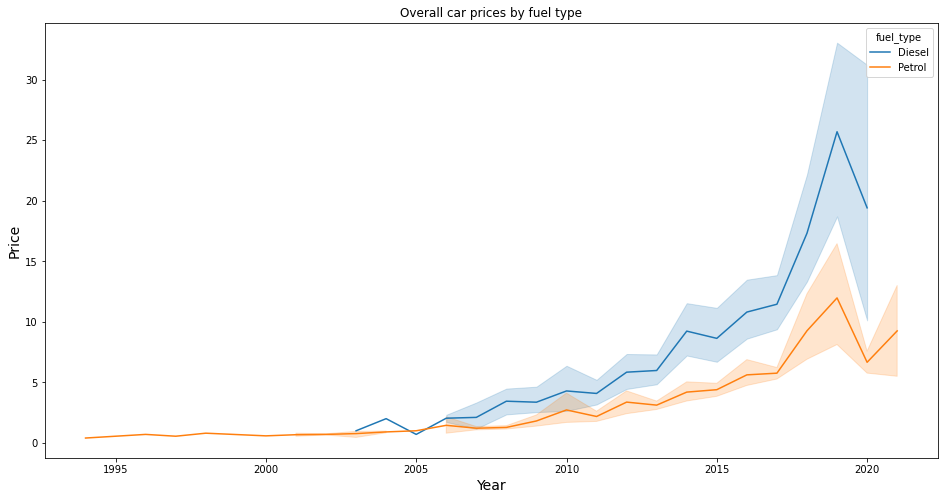

In [333]:
fig, ax = plt.subplots(figsize=(16,8))
sns.lineplot(data=fuel_df, x='year', y='price', hue='fuel_type')
ax.xaxis.set_label_text("Year",fontdict= {'size':14})
ax.yaxis.set_label_text("Price",fontdict= {'size':14})
plt.title("Overall car prices by fuel type")

In [351]:
fuel_sales_df = df[df.year.isin(pd.DataFrame(df.year.unique())[0].nlargest(10))]
salesByYearBodyClass = fuel_sales_df.pivot_table(index=['year','fuel_type'], values='price', aggfunc='mean')
salesByYearBodyClass.reset_index(inplace=True)

Text(0.5, 1.0, 'Latest 10 year car prices by engine type')

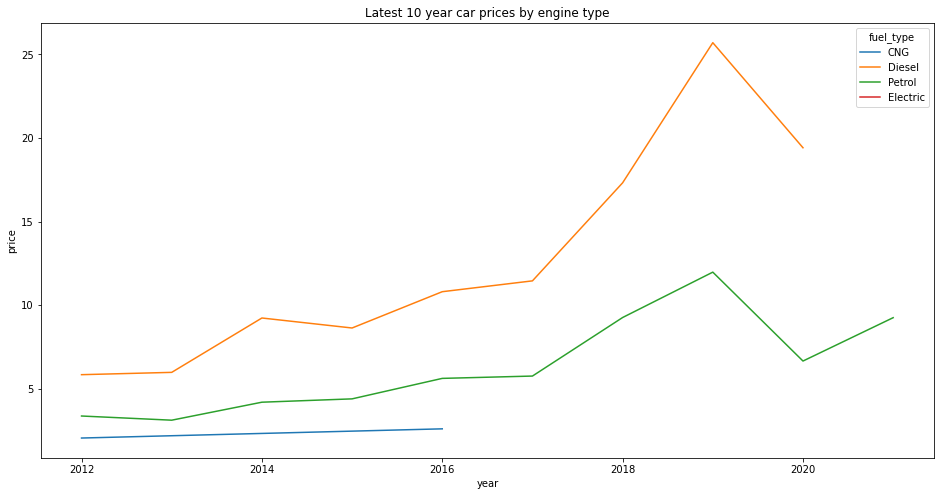

In [352]:
plt.figure(figsize=(16,8))
sns.lineplot(data=salesByYearBodyClass, x='year', y='price', hue='fuel_type')
plt.title("Latest 10 year car prices by engine type")

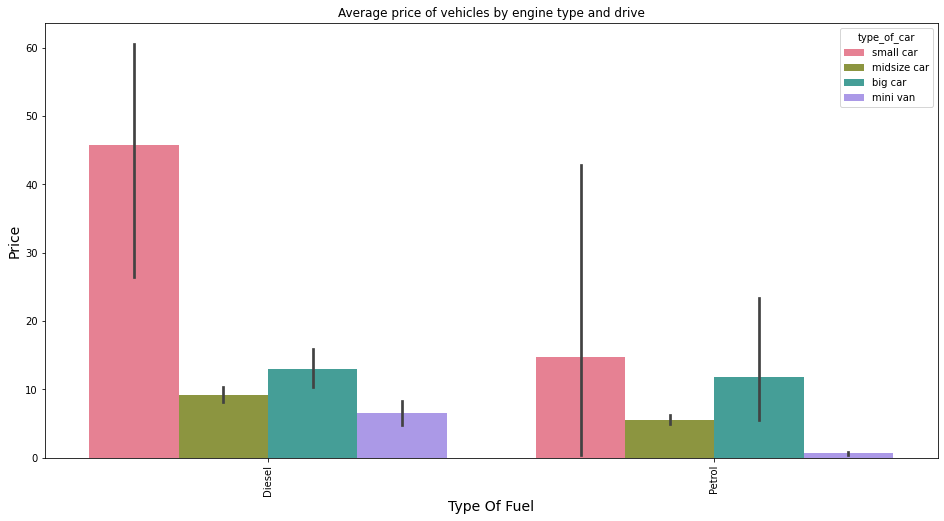

In [331]:
fig, ax = plt.subplots(figsize=(16,8))

sns.barplot(x="fuel_type", y="price", hue= "type_of_car", palette="husl",data=fuel_df)
ax.set_title("Average price of vehicles by engine type and drive",fontdict= {'size':12})
ax.xaxis.set_label_text("Type Of Fuel",fontdict= {'size':14})
ax.yaxis.set_label_text("Price",fontdict= {'size':14})
ticks = plt.setp(ax.get_xticklabels(),rotation=90)

In [369]:
df['fuel_type'].value_counts()

Diesel      444
Petrol      327
CNG           4
LPG           2
Electric      1
Name: fuel_type, dtype: int64

### Dataset correlation with engine

In [348]:
salesByYearBodyClass = 

,year,fuel_type,price
0,2012,CNG,2.050000
1,2012,Diesel,5.840000
2,2012,Petrol,3.367273
3,2013,Diesel,5.978627
4,2013,Petrol,3.117500
5,2014,Diesel,9.230488
6,2014,Petrol,4.193478
7,2015,Diesel,8.632667
8,2015,Petrol,4.393000
9,2016,CNG,2.600000


In [353]:
def get_carpricesales(et):
    return salesByYearBodyClass[salesByYearBodyClass.fuel_type == et]

def get_priceByYearEngType(r):
    return df[(df.year == r.year) & (df.fuel_type == r.fuel_type)].manufacturer.count()

def plotGraph(et):
    carSalesPrice = get_carpricesales(et)
    plt.figure(figsize=(20, 8))
    ax = carSalesPrice.plot('year','sales')
    carSalesPrice.plot('year','price',secondary_y=True, ax=ax)
    plt.legend()

In [354]:
salesByYearBodyClass['sales'] = salesByYearBodyClass.apply(get_priceByYearEngType, axis=1)

<Figure size 1152x576 with 0 Axes>

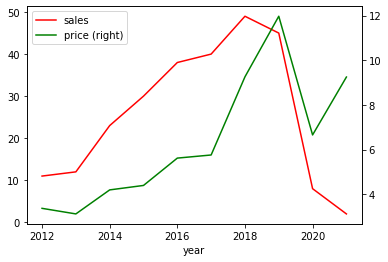

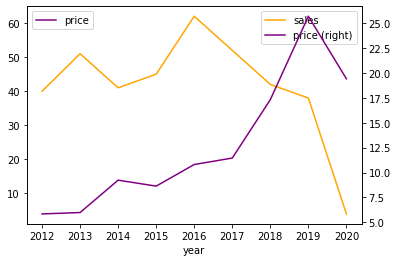

In [355]:
petrolcarSalesPrice = get_carpricesales('Petrol')
dieselCarSalesPrice = get_carpricesales('Diesel')

plt.figure(figsize=(16, 8))
ax = petrolcarSalesPrice.plot('year','sales', color='r')
petrolcarSalesPrice.plot('year','price', color='g', secondary_y=True, ax=ax)

ax = dieselCarSalesPrice.plot('year','sales', color='orange')
dieselCarSalesPrice.plot('year','price', color='purple', secondary_y=True, ax=ax)


plt.legend()

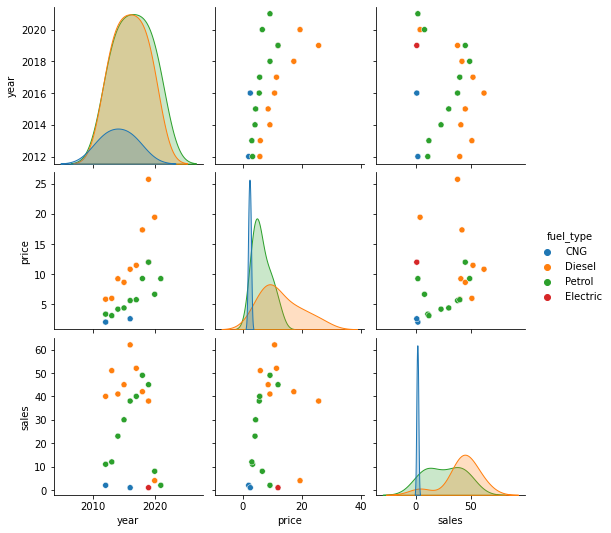

In [356]:
sns.pairplot(data=salesByYearBodyClass, hue='fuel_type')

<AxesSubplot:xlabel='sales', ylabel='price'>

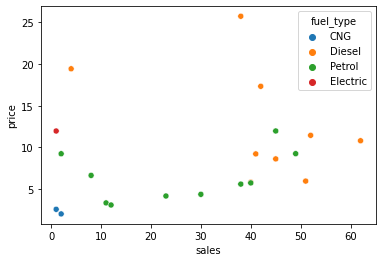

In [357]:
sns.scatterplot(data=salesByYearBodyClass, x='sales', y='price', hue='fuel_type')

### Observations:
  
* Most preferred fuel type is Petrol and Diesel.
* Cars with Diesel as its fuel_type are costlier than a car with Petrol as its fuel_type.
* Most sales happening price range is around 3.0 to 13.0 lakhs /-

---
# Summarization


### Conclusion

1. Most sales happening price range is between 3,00,000/- to 13,00,000/-

2. Though the cars with Petrol engine type sold at most economical price, cars with Diesel engine type is in demand with huge price tag

3. Even with effordable price range, CNG, LPG and Electric cars were least preferred.

4. Most on sale 
    * engine types are Diesel and then Petrol
    * body types are midsize car.
    
5. Midsize Cars are more demanded type of car. Economy Cars are best selling segment followed by Luxury and Premium

6. Most of the premium cars engine type is **Diesel** and have Automatic transmission

7. Cars Loose / Gain Demand
    * Following are the brands which **loose the market**
        * Daewoo
        * OpelCorsa
        * Skoda
        * Ambassador
        * Kia

    * Following are the brands which **gain/sustain the market**
        * Maruti
        * Hyundai
        * Mahindra
        * Tata
        * Ford
        * Chevrolet
        * Honda
        * Toyota
        * Volkswagen
        * Mitsubishi
        * BMW
        * Fiat
        * Mercedes-Benz
        * Nissan
        * Audi
        * Renault
        
8. Following are the best mileage given cars in each segment.
    * Economy --> Tata Nexon & Hyundai Verna
    * Luxury  --> Mercedes Benz E-Class & Jeep Compass
    * Premium --> BMW 3-Series